### <font color = yellow> Lecture 5: Singular Value Decomposition(SVD)

As on slides, SVD of matrix  𝐴  is:

𝐴= 𝑈𝐷𝑉^𝑇 

Where:

𝑈  is an orthogonal  𝑚×𝑚  matrix; its columns are the left-singular vectors of  𝐴 .
𝑉  is an orthogonal  𝑛×𝑛  matrix; its columns are the right-singular vectors of  𝐴 .
𝐷  is a diagonal  𝑚×𝑛  matrix; elements along its diagonal are the singular values of A

In [1]:
import numpy as np
A = np.array([[-1,2],[3,-2],[5,7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [9]:
U,d,VT = np.linalg.svd(A)  # V is already transposed
print(f'The orthogonal matrix m x m is :\n {U} \n')
print(f'The diagonal m x n matrix is :\n {d} \n')
print(f'Diagonal matrix : \n{np.diag(d)} \n')
print(f'The orthogonal matrix n x n is :\n {VT} \n')

The orthogonal matrix m x m is :
 [[ 0.12708324  0.47409506  0.87125411]
 [ 0.00164602 -0.87847553  0.47778451]
 [ 0.99189069 -0.0592843  -0.11241989]] 

The diagonal m x n matrix is :
 [8.66918448 4.10429538] 

Diagonal matrix : 
[[8.66918448 0.        ]
 [0.         4.10429538]] 

The orthogonal matrix n x n is :
 [[ 0.55798885  0.82984845]
 [-0.82984845  0.55798885]] 



SVD and eigendecomposition are closely related to each other:

Left-singular vectors of  𝐴  = eigenvectors of  𝐴𝐴𝑇 . <br>
Right-singular vectors of  𝐴  = eigenvectors of  𝐴𝑇𝐴 .<br>
Non-zero singular values of  𝐴  = square roots of eigenvalues of  𝐴𝐴𝑇  = square roots of eigenvalues of  𝐴𝑇𝐴

### Image Compression via SVD

The section feature code adapted from <br>
https://gist.github.com/frankcleary/4d2bd178708503b556b0

In [11]:
import  matplotlib.pyplot as plt
from PIL import Image

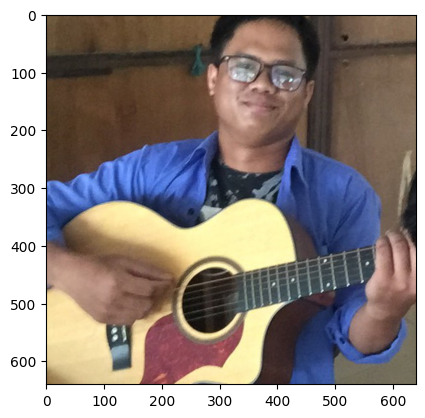

In [14]:
img = Image.open('Image.jpg')
plt.imshow(img)
plt.show()

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channel:

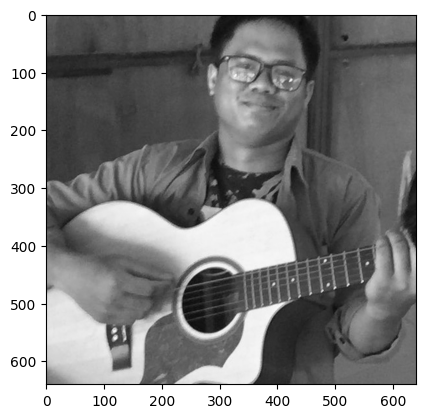

In [17]:
image_gray = img.convert('LA')
plt.imshow(image_gray)
plt.show()

Convert data into numpy matrix, which does not impact image data:

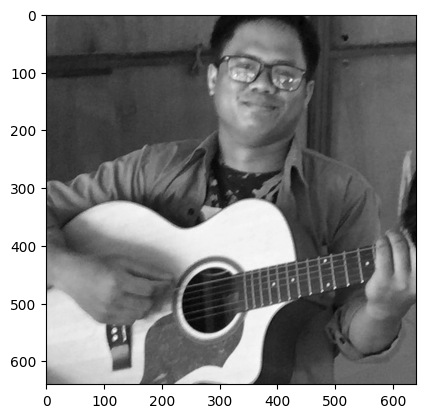

In [38]:
image_mat = np.array(list(image_gray.getdata(band=0)),float)
image_mat.shape = (image_gray.size[1] ,image_gray.size[0])
image_mat = np.matrix(image_mat)
plt.imshow(image_mat,cmap='gray')
plt.show()

In [39]:
# Calculate SVD of the image mat
U,sigma,V = np.linalg.svd(image_mat)
U

matrix([[-0.02579252, -0.01759752,  0.03361693, ..., -0.02298511,
          0.03224674, -0.05884595],
        [-0.02571184, -0.01776316,  0.03374944, ...,  0.04454067,
         -0.03000566,  0.00606016],
        [-0.02561572, -0.01771758,  0.03421005, ...,  0.02503146,
          0.04077696,  0.11351058],
        ...,
        [-0.04890785, -0.01238915, -0.04322583, ..., -0.04913732,
         -0.06005115,  0.04537634],
        [-0.0480189 , -0.01459321, -0.03729435, ...,  0.03161303,
          0.06808548, -0.08066626],
        [-0.04702847, -0.01771462, -0.03094609, ..., -0.01675791,
         -0.0395252 ,  0.04440435]])

In [40]:
sigma

array([7.26848574e+04, 1.66424688e+04, 1.17760739e+04, 9.17647413e+03,
       8.42516635e+03, 8.02565039e+03, 5.38108650e+03, 4.86561922e+03,
       4.34698592e+03, 3.89582785e+03, 3.63524822e+03, 3.23004751e+03,
       2.97696753e+03, 2.81233101e+03, 2.67895619e+03, 2.36546725e+03,
       2.35731890e+03, 2.22397874e+03, 2.18081759e+03, 1.98098689e+03,
       1.93932342e+03, 1.67886225e+03, 1.66140315e+03, 1.60519436e+03,
       1.49737121e+03, 1.43417480e+03, 1.37767858e+03, 1.32155888e+03,
       1.28537023e+03, 1.25736415e+03, 1.20956641e+03, 1.17339144e+03,
       1.14639998e+03, 1.13133314e+03, 1.10278358e+03, 1.01051763e+03,
       9.92506616e+02, 9.64004285e+02, 9.32425094e+02, 9.13469553e+02,
       8.80324980e+02, 8.44731681e+02, 8.15793957e+02, 8.05806751e+02,
       7.91798608e+02, 7.68362797e+02, 7.46031845e+02, 7.16525843e+02,
       7.02682984e+02, 6.80786442e+02, 6.63378616e+02, 6.43448156e+02,
       6.25610561e+02, 6.11732678e+02, 6.07202246e+02, 5.96278687e+02,
      

In [41]:
V

matrix([[-0.04087644, -0.04087959, -0.04091019, ..., -0.03455545,
         -0.03426547, -0.03405043],
        [-0.06984795, -0.0706797 , -0.07190787, ..., -0.01174965,
         -0.01318269, -0.01420511],
        [ 0.01487232,  0.01547799,  0.01590301, ...,  0.07922047,
          0.07885406,  0.07802478],
        ...,
        [ 0.01102436,  0.00977   , -0.01227759, ..., -0.07086082,
          0.07900865, -0.0302788 ],
        [ 0.03611389, -0.08710751,  0.01710115, ...,  0.03768697,
          0.01315608, -0.04622489],
        [ 0.01182494, -0.01639268,  0.03680605, ...,  0.01931318,
          0.00662508, -0.00472971]])

As eigenvalues are arranged in descending order in diag( 𝜆 ) so too are singular values, by convention, arranged in descending order in  𝐷  (or, in this code, diag( 𝜎 )). Thus, the first left-singular vector of  𝑈  and first right-singular vector of  𝑉  may represent the most prominent feature of the image:

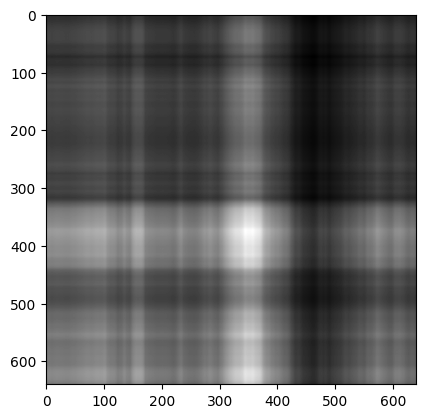

In [53]:
reconstruct_image = np.matrix(U[:,:1]) * np.diag(sigma[:1]) * np.matrix(V[:1,:])
plt.imshow(reconstruct_image,cmap='gray')
plt.show()

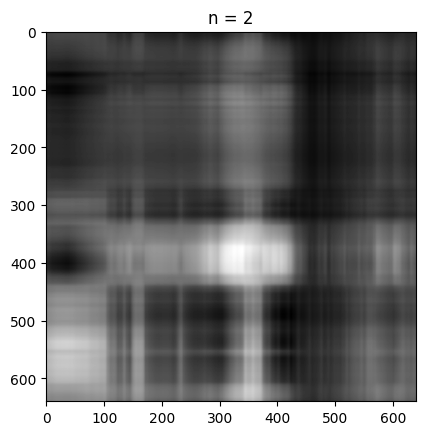

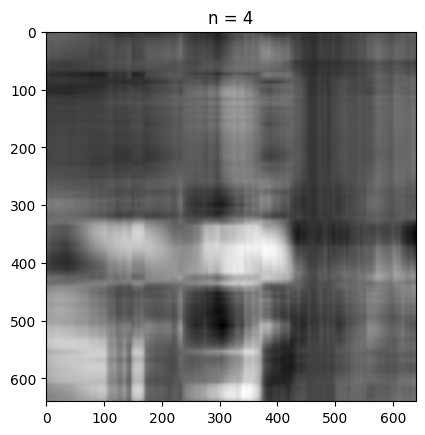

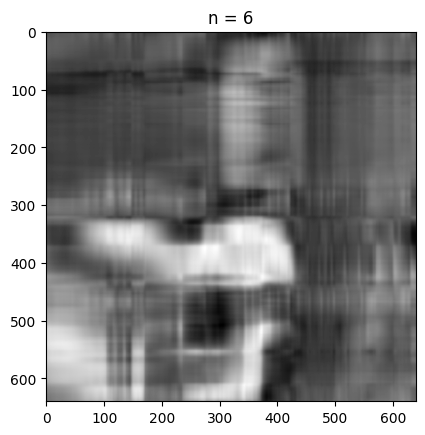

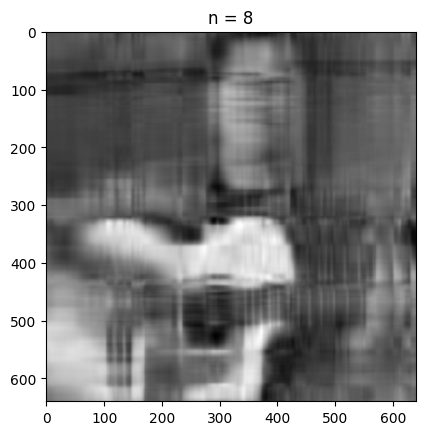

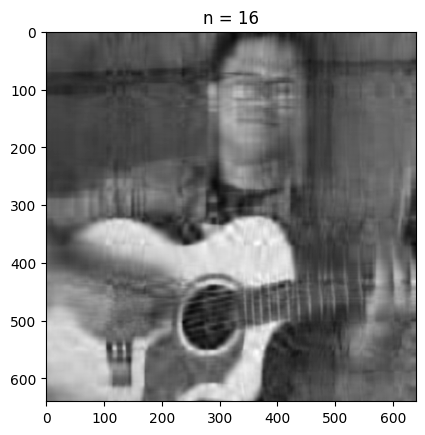

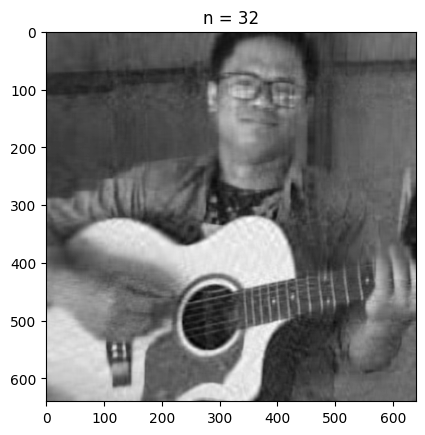

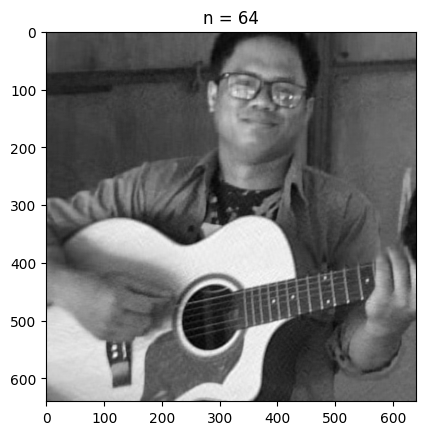

In [54]:
# Additional singular vectore improve the image quality
for i in [2,4,6,8,16,32,64]:
  reconstruct_image = np.matrix(U[:,:i]) * np.diag(sigma[:i]) * np.matrix(V[:i,:])
  plt.imshow(reconstruct_image,cmap='gray')
  title = "n = %s" % i
  plt.title(title)
  plt.show()

With 64 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [55]:
image_mat.shape

(640, 640)

In [56]:
full_representation = 640*640
full_representation

409600

In [57]:
svd64_representation = 128*4032 + 128 + 128*3024
svd64_representation

903296

In [58]:
svd64_representation/full_representation

2.2053125

Specifically, the image represented as 64 singular vectors is 3.7% of the size of the original!
Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

### <font color = yellow> The Moore-Penrose Pseudoinverse

Let's calculate the pseudoinverse  𝐴+  of some matrix  𝐴  using the formula from the slides:

𝐴^+ =𝑉𝐷^{+}𝑈^𝑇

In [59]:
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

As shown earlier, the Numpy SVD method returns U,d and V^T

In [63]:
U,d,VT = np.linalg.svd(A)

In [64]:
U

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [65]:
d

array([8.66918448, 4.10429538])

In [66]:
VT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

To create D+, we first invert the non-zero values of d:

In [68]:
D = np.diag(d)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

In [69]:
1/8.6669

0.11538150895937417

In [70]:
1/4.104

0.24366471734892786

And then we would take the transpose of the resulting matrix.<br>
Because D is a diagonal matrix, this can, however be done in a single step by inverting D:

In [73]:
D_inv= np.linalg.inv(D)
D_inv

array([[0.1153511 , 0.        ],
       [0.        , 0.24364718]])

D+ must have the same dimension as AT in order for VD + UT matrix multiplication to be

In [74]:
D_plus = np.concatenate((D_inv,np.array([[0,0]]).T), axis=1)
D_plus

array([[0.1153511 , 0.        , 0.        ],
       [0.        , 0.24364718, 0.        ]])

Recall D must have the same dimensions as A for SVD's UDV^T, but for MPP U and V are swapped sides around the diagonal matrix

Now we have everything we need to calculate A+with VD^+U^T:

In [75]:
np.dot(VT.T, np.dot(D_plus,U.T))

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

Working out this derivation is helpful for understanding how Moore-Penrose pseudoinverses work, but unsurprisingly NumPy is loaded with an existing method pinv()

In [76]:
np.linalg.pinv(A)

array([[-0.08767773,  0.17772512,  0.07582938],
       [ 0.07661927, -0.1192733 ,  0.08688784]])

A. The pseudoinverse is a generalization of the matrix inverse for non-square matrices, and it is used to solve linear systems when the matrix is not invertible or has more equations than unknowns.

The pseudoinverse of a matrix A is defined as:

A^+ = VΣ^+ U^T

where U, Σ, and V are the singular value decomposition (SVD) of A, and Σ^+ is the pseudoinverse of Σ. The pseudoinverse of Σ is obtained by taking the reciprocal of the nonzero singular values and setting the other values to zero.

The pseudoinverse has many applications in linear algebra and statistics, such as solving least-squares problems, finding the best-fit line for a set of data points, and computing the Moore-Penrose inverse of a matrix. The np.pinv() function is a convenient way to compute the pseudoinverse of a matrix in NumPy, and it is widely used in scientific computing and data analysis.

## Exercise

For regression problems, we typically have many more cases ( 𝑛 , or rows of  𝑋 ) than features to predict (columns of  𝑋 ). Let's solve a miniature example of such an overdetermined situation.

We have eight data points ( 𝑛  = 8):

In [79]:
x1 = [0,1,2,3,4,5,6,7.] # eg.: Dosage of drug for treating Alzheimer's disease
y1= [1.86, 1.31,.62,.33, .09, -.67, -1.23, -1.37] # eg.: Patient's "forgetfulness score"

In [80]:
title = 'Clinical Trial'
xlabel = 'Drug dosage(ml)'
ylabel = 'Forgetfullness'

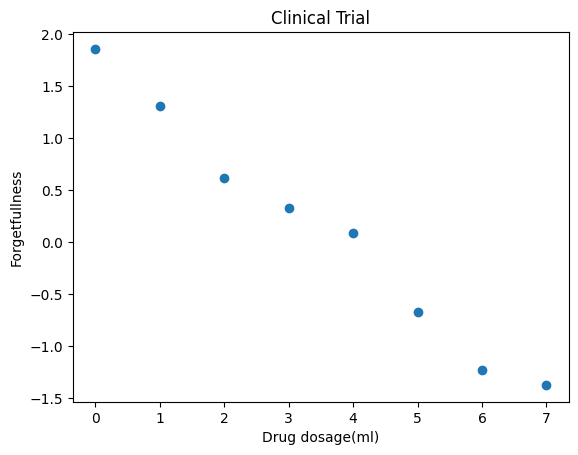

In [82]:
fig,ax = plt.subplots()
plt.title(title)
plt.xlabel(xlabel=xlabel)
plt.ylabel(ylabel=ylabel)
ax.scatter(x1,y1)
plt.show()

Although it appears there is only one predictor ( 𝑥1 ), our model requires a second one (let's call it  𝑥0 ) in order to allow for a  𝑦 -intercept. Without this second variable, the line we fit to the plot would need to pass through the origin (0, 0). The  𝑦 -intercept is constant across all the points so we can set it equal to 1 across the board:

In [83]:
x0 = np.ones(8)
x0

array([1., 1., 1., 1., 1., 1., 1., 1.])

Concatenate  𝑥0  and  𝑥1  into a matrix  𝑋 :

In [84]:
x = np.concatenate((np.matrix(x0).T, np.matrix(x1).T), axis=1)
x

matrix([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.]])

From the slides, we know that we can calculate the weights  𝑤  using the equation  𝑤=𝑋+𝑦 :

In [86]:
w = np.dot(np.linalg.pinv(x),y)
w

matrix([[ 1.76      , -0.46928571]])

The first weight correspond to the y-intercept of the line, which is typically denoted as b:

In [87]:
b = np.asarray(w).reshape(-1)[0]
b

1.7599999999999985

While the second weight corresponds to the slope of the line, which is typically denoted as m:

In [88]:
m = np.asarray(w).reshape(-1)[1]
m

-0.4692857142857139

With the weight can be plot line to confirm it fits the points:

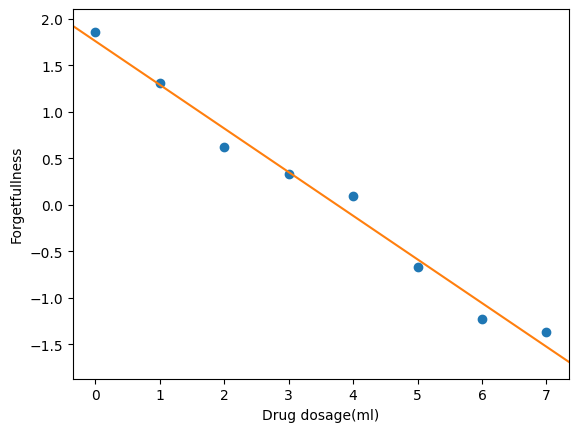

In [89]:
fig,ax = plt.subplots()
plt.xlabel(xlabel=xlabel)
plt.ylabel(ylabel=ylabel)

ax.scatter(x1,y1)

x_min, x_max = ax.get_xlim()
y_at_xmin = m*x_min + b
y_at_xmax = m*x_max + b

ax.set_xlim([x_min,x_max])
ax.plot([x_min,x_max],[y_at_xmin, y_at_xmax], c= 'C01')
plt.show()

### Principal Component Analysis (PCA)

In [90]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [91]:
iris.data.shape

(150, 4)

In [92]:
iris.get('feature_names')

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [93]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [94]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
%matplotlib notebook
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components=2)
x = pca.fit_transform(iris.data)
x

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [125]:
x.shape

(150, 2)

In [126]:
x[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

In [133]:
a = x[:,0]
a

array([-2.68412563, -2.71414169, -2.88899057, -2.74534286, -2.72871654,
       -2.28085963, -2.82053775, -2.62614497, -2.88638273, -2.6727558 ,
       -2.50694709, -2.61275523, -2.78610927, -3.22380374, -2.64475039,
       -2.38603903, -2.62352788, -2.64829671, -2.19982032, -2.5879864 ,
       -2.31025622, -2.54370523, -3.21593942, -2.30273318, -2.35575405,
       -2.50666891, -2.46882007, -2.56231991, -2.63953472, -2.63198939,
       -2.58739848, -2.4099325 , -2.64886233, -2.59873675, -2.63692688,
       -2.86624165, -2.62523805, -2.80068412, -2.98050204, -2.59000631,
       -2.77010243, -2.84936871, -2.99740655, -2.40561449, -2.20948924,
       -2.71445143, -2.53814826, -2.83946217, -2.54308575, -2.70335978,
        1.28482569,  0.93248853,  1.46430232,  0.18331772,  1.08810326,
        0.64166908,  1.09506066, -0.74912267,  1.04413183, -0.0087454 ,
       -0.50784088,  0.51169856,  0.26497651,  0.98493451, -0.17392537,
        0.92786078,  0.66028376,  0.23610499,  0.94473373,  0.04

In [137]:
b = x[:,-1]
b

array([ 0.31939725, -0.17700123, -0.14494943, -0.31829898,  0.32675451,
        0.74133045, -0.08946138,  0.16338496, -0.57831175, -0.11377425,
        0.6450689 ,  0.01472994, -0.235112  , -0.51139459,  1.17876464,
        1.33806233,  0.81067951,  0.31184914,  0.87283904,  0.51356031,
        0.39134594,  0.43299606,  0.13346807,  0.09870885, -0.03728186,
       -0.14601688,  0.13095149,  0.36771886,  0.31203998, -0.19696122,
       -0.20431849,  0.41092426,  0.81336382,  1.09314576, -0.12132235,
        0.06936447,  0.59937002,  0.26864374, -0.48795834,  0.22904384,
        0.26352753, -0.94096057, -0.34192606,  0.18887143,  0.43666314,
       -0.2502082 ,  0.50377114, -0.22794557,  0.57941002,  0.10770608,
        0.68516047,  0.31833364,  0.50426282, -0.82795901,  0.07459068,
       -0.41824687,  0.28346827, -1.00489096,  0.2283619 , -0.72308191,
       -1.26597119, -0.10398124, -0.55003646, -0.12481785, -0.25485421,
        0.46717949, -0.35296967, -0.33361077, -0.54314555, -0.58

In [138]:
fig, ax = plt.subplots()
plt.xlabel(xlabel)
plt.ylabel(ylabel)
ax.scatter(a,b)
plt.show()

<IPython.core.display.Javascript object>

In [139]:
iris.target.shape

(150,)

In [115]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [116]:
unique_elements, counts_elements = np.unique(iris.target,return_counts=True)
np.asarray((unique_elements,counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]], dtype=int64)

In [118]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [119]:
plt.scatter(x[:,0],x[:,1], c = iris.target)

<IPython.core.display.Javascript object>